In [1]:
import pandas as pd
from datetime import datetime, timedelta
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Mounted at /content/drive


In [2]:
gdrive_path = "/content/drive" + "/My Drive" + "/Colab Notebooks/Workshop 5/"
#pathMember = gdrive_path + "data member.xlsx"
#pathTrx2021 = gdrive_path + "transaction 2021.xlsx"
#pathTrx2022 = gdrive_path + "transaction 2022.xlsx"
#pathTrx2023 = gdrive_path + "transaction 2023.xlsx"
#pathItem = gdrive_path + "Item_sold.csv"
#dfItem = pd.read_csv(pathItem)
dfMember = pd.read_excel('https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/786a4c2c170eea3869dbffa2d60aeb284a7f0c42/Workshop5%20-%20Customer%20Segmentation/data%20member.xlsx', sheet_name = "ent_data")
#dfTrx2021 = pd.read_excel('https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/786a4c2c170eea3869dbffa2d60aeb284a7f0c42/Workshop5%20-%20Customer%20Segmentation/transaction%202021.xlsx', sheet_name = "trans_data_2021")
#dfTrx2022 = pd.read_excel('https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/786a4c2c170eea3869dbffa2d60aeb284a7f0c42/Workshop5%20-%20Customer%20Segmentation/transaction%202022.xlsx', sheet_name = "trans_data_2022")
dfTrx2023 = pd.read_excel('https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/786a4c2c170eea3869dbffa2d60aeb284a7f0c42/Workshop5%20-%20Customer%20Segmentation/transaction%202023.xlsx', sheet_name = "trans_data_2023")




# 1. Customer Segmentation
- Finding means of transaction lag

In [3]:
df =  pd.DataFrame()
df = dfTrx2023.copy()
#df= df.append(dfTrx2022, ignore_index=True)

df['payment_date'] = pd.to_datetime(df['payment_date'])
df_sorted = df.sort_values(['ent', 'payment_date'])
df_sorted['transaction_lag'] = df_sorted.groupby('ent')['payment_date'].diff()
average_lag = df_sorted.groupby('ent')['transaction_lag'].mean()
all_average_lag = df_sorted['transaction_lag'].mean()
print(all_average_lag)

15 days 08:24:32.362155820


- Identify non-cherner customer by using 1 month repurchase after max transaction date as criteria

In [4]:
#Create non-churners customer
reference_date = df['payment_date'].max()
print(reference_date)
print(reference_date - pd.DateOffset(months=1))
cutoff_date = reference_date - pd.DateOffset(months=3)

high_value_customers = df[df['payment_date'] >= cutoff_date]

churners = high_value_customers.groupby('ent').filter(lambda x: x['payment_date'].max() <= reference_date - pd.DateOffset(months=1))
print(churners)
churners = churners['ent'].unique()
Test_churners = pd.DataFrame(churners, columns=['ent'])
print(Test_churners)

nonchurners = high_value_customers.groupby('ent').filter(lambda x: x['payment_date'].max() >= reference_date - pd.DateOffset(months=1))
nonchurners = nonchurners['ent'].unique()
Test_nonchurners = pd.DataFrame(nonchurners, columns=['ent'])
print(Test_nonchurners)


2023-07-06 00:00:00
2023-06-06 00:00:00
       payment_date          ent  center  \
180533   2023-04-06  TCC4QQ14QZ5  TKC14E   
180534   2023-04-06  TCC4JRE31ZK  TKC14E   
180536   2023-04-06  TCCECQWJEJ7  TKC14E   
180537   2023-04-06  TCCEJZJW3J0  TKC14E   
180539   2023-04-06  TCC4RJCQWZI  TFCEZ1   
...             ...          ...     ...   
310015   2023-06-06  TCC4JWJW1JB  TSCER4   
310017   2023-06-06  TCC4JERCRE2  T7CR41   
310018   2023-06-06  TCC4JQ4QQQB  T2CR4E   
310019   2023-06-06  TCCEJZW1CC5  T2CR4E   
310020   2023-06-06  TCCEQ1C41Q2  T2CR4E   

                                             product_json  total_amount  \
180533  [{"product":"KCECWJ","qty":1},{"product":"6CQC...      340000.0   
180534                     [{"product":"KCECWJ","qty":1}]      335000.0   
180536                     [{"product":"KCECWJ","qty":1}]      335000.0   
180537  [{"product":"KCECWJ","qty":1},{"product":"6CQC...      340000.0   
180539  [{"product":"8CECEC","qty":1},{"product":"6CQC..

In [5]:
#Filter transaction only non-churner ent
dfnonchurners = df.loc[df['ent'].isin(Test_nonchurners['ent'])]
print(dfnonchurners)
print(len(df))

       payment_date          ent  center  \
0        2023-01-01  TCC4QCZJZQI  TKC11Z   
1        2023-01-01  TCC4QCE34Z7  T2CEQ1   
2        2023-01-01  TCC44Q3JQQ2  TFCEZ1   
4        2023-01-01  TCC4JZCJ1JK  TKCRCW   
5        2023-01-01  TCC4WQRQZ40  T7CCJR   
...             ...          ...     ...   
362104   2023-07-06  TCCEREZCC10  TKC1Z4   
362105   2023-07-06  TCCEQ1RJ3JY  TKC1Z4   
362106   2023-07-06  TCCEQ4Z4R4Y  TKC1Z4   
362107   2023-07-06  TCCEQEZJQ4F  TKC1Z4   
362108   2023-07-06  TCCEQ434R1F  TKC1Z4   

                                             product_json  total_amount  \
0       [{"product":"5C4CCE","qty":1},{"product":"6CQC...      590000.0   
1       [{"product":"BC4C41","qty":2},{"product":"6CQC...      243000.0   
2       [{"product":"2C1CCW","qty":1},{"product":"2C1C...     1792000.0   
4                            [{"product":"4E1J","qty":2}]      198000.0   
5                          [{"product":"8C4CC1","qty":1}]      329000.0   
...                  

In [6]:
print(dfMember)

             ent original_status  join_month  join_year    sponsor
0       UCC4CC4F               -           5       2014  8844CQCEY
1       UCC4CCEK               -           5       2014  8844CQCCU
2       UCC4CC15               -           5       2014  8844CQCEY
3       UCC4CCR2               -           5       2014  8844CQCEY
4       UCC4CCJP               -           5       2014  8844CQCEY
...          ...             ...         ...        ...        ...
590560  H3CCC43B               A           7       2010   H3CCC4R2
590561  H3CCC4ZY               A           6       2010   H3CCC4JP
590562  H3CCCEC7               A           7       2010   H3CCC4JP
590563  H3CCCE4I               A           7       2010   H3CCC4JP
590564  H3CCCEEF               A           7       2010   H3CCC4WU

[590565 rows x 5 columns]


In [7]:
dfnonchurners.head()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type
0,2023-01-01,TCC4QCZJZQI,TKC11Z,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online
1,2023-01-01,TCC4QCE34Z7,T2CEQ1,"[{""product"":""BC4C41"",""qty"":2},{""product"":""6CQC...",243000.0,2500.0,240500,online
2,2023-01-01,TCC44Q3JQQ2,TFCEZ1,"[{""product"":""2C1CCW"",""qty"":1},{""product"":""2C1C...",1792000.0,0.0,0,online
4,2023-01-01,TCC4JZCJ1JK,TKCRCW,"[{""product"":""4E1J"",""qty"":2}]",198000.0,0.0,0,online
5,2023-01-01,TCC4WQRQZ40,T7CCJR,"[{""product"":""8C4CC1"",""qty"":1}]",329000.0,0.0,0,offline


- Create features from purchase transaction for classification

In [8]:
df2 = pd.DataFrame()
df2['ent'] = dfnonchurners['ent'].unique()
#Paid_last_3M_online
last_3_months = dfnonchurners[(dfnonchurners['payment_date'] >= reference_date - pd.DateOffset(months=3)) & (dfnonchurners['trans_origin_type'] == 'online')]
paid_last_3M_online = last_3_months.groupby('ent')['paid_amount'].sum().reset_index()
df2 = df2.merge(paid_last_3M_online, on='ent', how='left')
df2 = df2.rename(columns={'paid_amount': 'paidLast3MOnline'})
df2['paidLast3MOnline'].fillna(0, inplace=True)
#NoVisit_last_3M_online
NoVisit_3M_online = last_3_months.groupby('ent')['payment_date'].count().reset_index()
df2 = df2.merge(NoVisit_3M_online, on='ent', how='left')
df2 = df2.rename(columns={'payment_date': 'NoVisit_3M_online'})
df2['NoVisit_3M_online'].fillna(0, inplace=True)

#Paid_last_3M_offline
last_3_months = dfnonchurners[(dfnonchurners['payment_date'] >= reference_date - pd.DateOffset(months=3)) & (dfnonchurners['trans_origin_type'] == 'offline')]
paid_last_3M_offline = last_3_months.groupby('ent')['paid_amount'].sum().reset_index()
df2 = df2.merge(paid_last_3M_offline, on='ent', how='left')
df2 = df2.rename(columns={'paid_amount': 'paidLast3MOffline'})
df2['paidLast3MOffline'].fillna(0, inplace=True)
#NoVisit_last_3M_online
NoVisit_3M_offline = last_3_months.groupby('ent')['payment_date'].count().reset_index()
df2 = df2.merge(NoVisit_3M_offline, on='ent', how='left')
df2 = df2.rename(columns={'payment_date': 'NoVisit_3M_offline'})
df2['NoVisit_3M_offline'].fillna(0, inplace=True)

#Paid_last_6M_online
last_6_months = dfnonchurners[(dfnonchurners['payment_date'] >= reference_date - pd.DateOffset(months=6)) & (dfnonchurners['trans_origin_type'] == 'online')]
paid_last_6M_online = last_6_months.groupby('ent')['paid_amount'].sum().reset_index()
df2 = df2.merge(paid_last_6M_online, on='ent', how='left')
df2 = df2.rename(columns={'paid_amount': 'paidLast6MOnline'})
df2['paidLast6MOnline'].fillna(0, inplace=True)
#NoVisit_last_6M_online
NoVisit_6M_online = last_6_months.groupby('ent')['payment_date'].count().reset_index()
df2 = df2.merge(NoVisit_6M_online, on='ent', how='left')
df2 = df2.rename(columns={'payment_date': 'NoVisit_6M_online'})
df2['NoVisit_6M_online'].fillna(0, inplace=True)

#Paid_last_6M_offline
last_6_months = dfnonchurners[(dfnonchurners['payment_date'] >= reference_date - pd.DateOffset(months=6)) & (dfnonchurners['trans_origin_type'] == 'offline')]
paid_last_6M_offline = last_6_months.groupby('ent')['paid_amount'].sum().reset_index()
df2 = df2.merge(paid_last_6M_offline, on='ent', how='left')
df2 = df2.rename(columns={'paid_amount': 'paidLast6MOffline'})
df2['paidLast6MOffline'].fillna(0, inplace=True)
#NoVisit_last_6M_online
NoVisit_6M_offline = last_6_months.groupby('ent')['payment_date'].count().reset_index()
df2 = df2.merge(NoVisit_3M_offline, on='ent', how='left')
df2 = df2.rename(columns={'payment_date': 'NoVisit_6M_offline'})
df2['NoVisit_6M_offline'].fillna(0, inplace=True)

#Mean time btw purchase
# Sort the DataFrame based on 'ent' and 'payment_date'
dfnonchurners.sort_values(['ent', 'payment_date'], inplace=True)
# Calculate the time difference between consecutive purchases for each 'ent'
dfnonchurners['time_diff'] = dfnonchurners.groupby('ent')['payment_date'].diff()
# Calculate the mean time between purchases for each 'ent'
mean_time_between_purchase = dfnonchurners.groupby('ent')['time_diff'].mean().dt.days
df2 = df2.merge(mean_time_between_purchase, on='ent', how='left')
df2 = df2.rename(columns={'time_diff': 'mean_time_between_purchase'})
df2['mean_time_between_purchase'].fillna(0, inplace=True)


print(df2)

<ipython-input-8-f094da0e71bd>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnonchurners.sort_values(['ent', 'payment_date'], inplace=True)
<ipython-input-8-f094da0e71bd>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnonchurners['time_diff'] = dfnonchurners.groupby('ent')['payment_date'].diff()


               ent  paidLast3MOnline  NoVisit_3M_online  paidLast3MOffline  \
0      TCC4QCZJZQI          587500.0                3.0                0.0   
1      TCC4QCE34Z7         4289500.0               12.0           396000.0   
2      TCC44Q3JQQ2         1589000.0                1.0          1891000.0   
3      TCC4JZCJ1JK         2704000.0                7.0                0.0   
4      TCC4WQRQZ40          398000.0               20.0                0.0   
...            ...               ...                ...                ...   
28851  TCCEQ1Z1QC7               0.0                0.0          1538000.0   
28852  TCCEQ1Z1QEF               0.0                0.0          1538000.0   
28853  TCCEQ1Z1QW0               0.0                0.0          1538000.0   
28854  TCCEQ1Q1CE7          498000.0                1.0                0.0   
28855  TCCEQC144J7               0.0                0.0           742000.0   

       NoVisit_3M_offline  paidLast6MOnline  NoVisit_6M_online 

- Create features from member network for classification

In [9]:
# Create a dictionary to store direct upline (sponsor) for each 'ent'
upline_dict = {}

# Iterate through the DataFrame to populate the dictionary
for index, row in dfMember.iterrows():
    ent = row['ent']
    sponsor = row['sponsor']
    if sponsor not in upline_dict:
        upline_dict[sponsor] = [ent]
    else:
        upline_dict[sponsor].append(ent)

# Create a new DataFrame to store the results
result_data = []

# Iterate through the DataFrame again to calculate downlines and uplines
for index, row in dfMember.iterrows():
    ent = row['ent']
    sponsor = row['sponsor']
    downlines = len(upline_dict.get(ent, []))
    uplines = len(upline_dict.get(sponsor, [])) if sponsor in upline_dict else 0
    result_data.append([ent, downlines, uplines])

# Create the final DataFrame with columns 'ent', 'downlines', and 'uplines'
result_df = pd.DataFrame(result_data, columns=['ent', 'downlines', 'uplines'])

print(result_df)

             ent  downlines  uplines
0       UCC4CC4F          2       12
1       UCC4CCEK          0       11
2       UCC4CC15          3       12
3       UCC4CCR2          0       12
4       UCC4CCJP          2       12
...          ...        ...      ...
590560  H3CCC43B          0        2
590561  H3CCC4ZY          0        3
590562  H3CCCEC7          1        3
590563  H3CCCE4I          0        3
590564  H3CCCEEF          0        1

[590565 rows x 3 columns]


In [10]:
df2 = df2.merge(result_df, on='ent', how='left')
df2['downlines'].fillna(0, inplace=True)
df2['uplines'].fillna(0, inplace=True)
print(df2)

               ent  paidLast3MOnline  NoVisit_3M_online  paidLast3MOffline  \
0      TCC4QCZJZQI          587500.0                3.0                0.0   
1      TCC4QCE34Z7         4289500.0               12.0           396000.0   
2      TCC44Q3JQQ2         1589000.0                1.0          1891000.0   
3      TCC4JZCJ1JK         2704000.0                7.0                0.0   
4      TCC4WQRQZ40          398000.0               20.0                0.0   
...            ...               ...                ...                ...   
28851  TCCEQ1Z1QC7               0.0                0.0          1538000.0   
28852  TCCEQ1Z1QEF               0.0                0.0          1538000.0   
28853  TCCEQ1Z1QW0               0.0                0.0          1538000.0   
28854  TCCEQ1Q1CE7          498000.0                1.0                0.0   
28855  TCCEQC144J7               0.0                0.0           742000.0   

       NoVisit_3M_offline  paidLast6MOnline  NoVisit_6M_online 

In [11]:
import pandas as pd
import networkx as nx

# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(dfMember, source='sponsor', target='ent', create_using=nx.DiGraph())

# Calculate the degree centrality for each 'ent' node
degree_centrality = nx.degree_centrality(G)
#betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

# Create DataFrames from the dictionaries
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree_Centrality']).reset_index()
#betweenness_df = pd.DataFrame.from_dict(betweenness, orient='index', columns=['Betweenness_Centrality'])
closeness_df = pd.DataFrame.from_dict(closeness, orient='index', columns=['Closeness_Centrality']).reset_index()



In [12]:
degree_centrality_df = degree_centrality_df.rename(columns={'index': 'ent'})
closeness_df = closeness_df.rename(columns={'index': 'ent'})

df3 = pd.merge(df2,degree_centrality_df, on='ent', how='left')
df3 = pd.merge(df3,closeness_df, on='ent', how='left')
print(df3)

#print(dfMember)
#print(degree_centrality_df)
#print(closeness_df)

               ent  paidLast3MOnline  NoVisit_3M_online  paidLast3MOffline  \
0      TCC4QCZJZQI          587500.0                3.0                0.0   
1      TCC4QCE34Z7         4289500.0               12.0           396000.0   
2      TCC44Q3JQQ2         1589000.0                1.0          1891000.0   
3      TCC4JZCJ1JK         2704000.0                7.0                0.0   
4      TCC4WQRQZ40          398000.0               20.0                0.0   
...            ...               ...                ...                ...   
28851  TCCEQ1Z1QC7               0.0                0.0          1538000.0   
28852  TCCEQ1Z1QEF               0.0                0.0          1538000.0   
28853  TCCEQ1Z1QW0               0.0                0.0          1538000.0   
28854  TCCEQ1Q1CE7          498000.0                1.0                0.0   
28855  TCCEQC144J7               0.0                0.0           742000.0   

       NoVisit_3M_offline  paidLast6MOnline  NoVisit_6M_online 

In [13]:
df3['Degree_Centrality'].fillna(0, inplace=True)
df3['Closeness_Centrality'].fillna(0, inplace=True)

In [14]:
gdrive_path = "/content/drive" + "/My Drive" + "/Colab Notebooks/Workshop 5/"
result = gdrive_path + 'HDIFeature.xlsx'
with pd.ExcelWriter(result) as writer:
      df2.to_excel(writer, index=False)

In [15]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 68.1 MB/s eta 0:0

In [16]:
import pandas as pd
from pycaret.datasets import get_data
from pycaret.clustering import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [17]:
df3.info()
#df4= df3.iloc[:,1:]

#print(df4)
#df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28856 entries, 0 to 28855
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ent                         28856 non-null  object 
 1   paidLast3MOnline            28856 non-null  float64
 2   NoVisit_3M_online           28856 non-null  float64
 3   paidLast3MOffline           28856 non-null  float64
 4   NoVisit_3M_offline          28856 non-null  float64
 5   paidLast6MOnline            28856 non-null  float64
 6   NoVisit_6M_online           28856 non-null  float64
 7   paidLast6MOffline           28856 non-null  float64
 8   NoVisit_6M_offline          28856 non-null  float64
 9   mean_time_between_purchase  28856 non-null  float64
 10  downlines                   28856 non-null  float64
 11  uplines                     28856 non-null  float64
 12  Degree_Centrality           28856 non-null  float64
 13  Closeness_Centrality        288

In [18]:
dfCLV = df3[['ent','paidLast3MOnline','paidLast3MOffline','paidLast6MOnline','paidLast6MOffline']]
dfFrequency = df3[['ent','NoVisit_3M_online','NoVisit_3M_offline','NoVisit_6M_online','NoVisit_6M_offline','mean_time_between_purchase']]
dfSNA = df3[['ent','downlines','uplines','Degree_Centrality','Closeness_Centrality']]

In [19]:
def DataDescriptive(data):
  data.hist(bins = 30, figsize = (12,10), grid = False)
  plt.show()

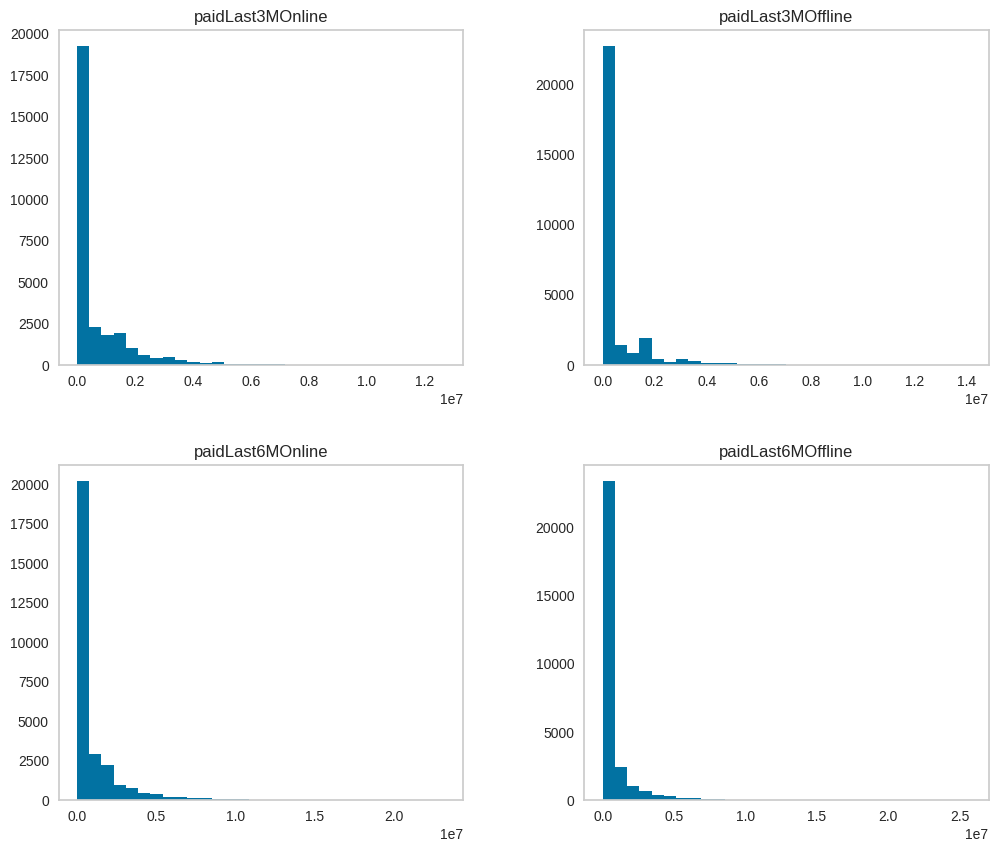

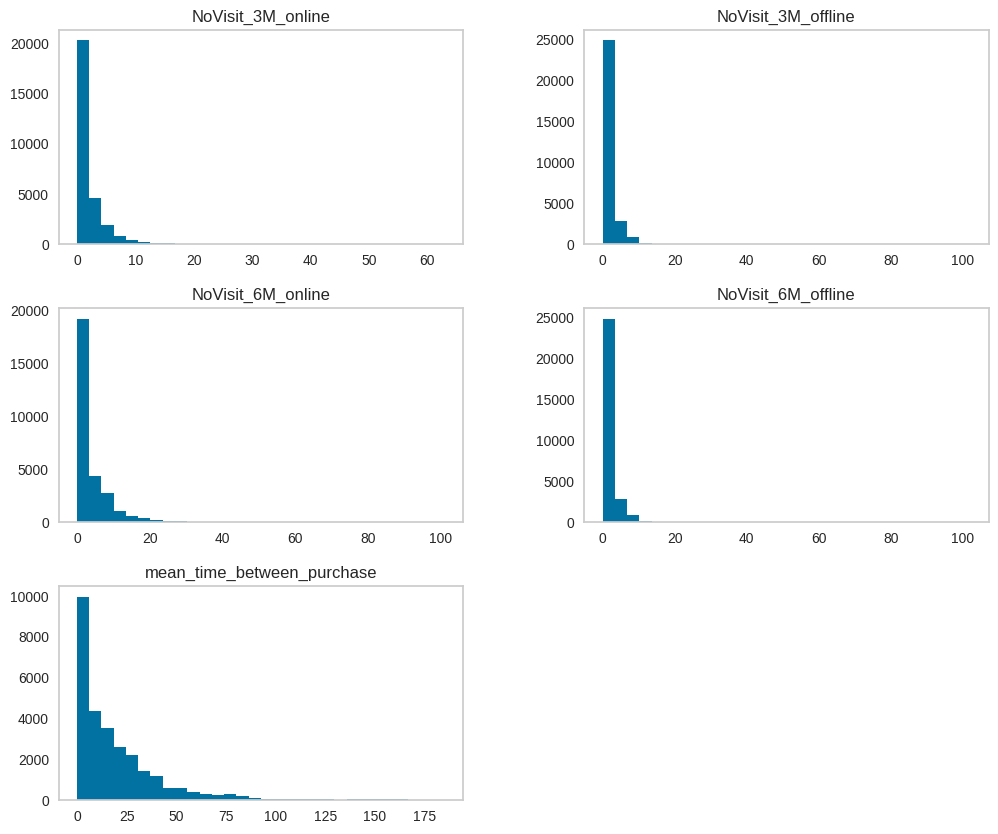

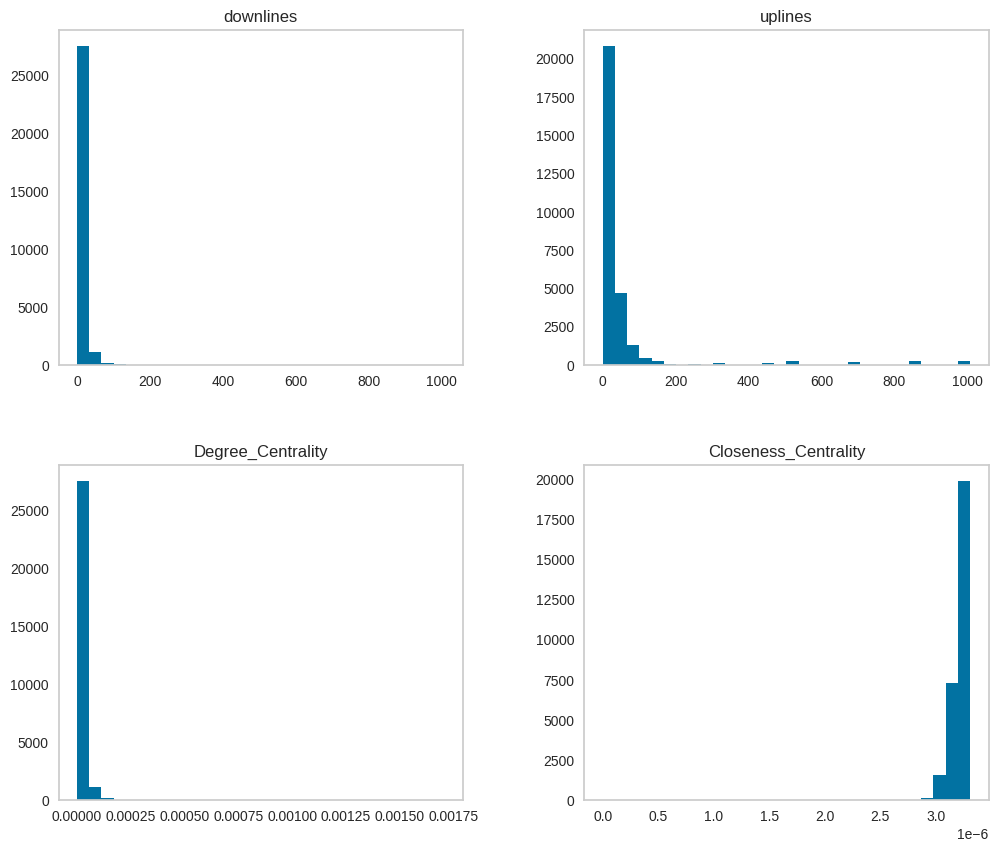

In [20]:
DataDescriptive(dfCLV)
DataDescriptive(dfFrequency)
DataDescriptive(dfSNA)

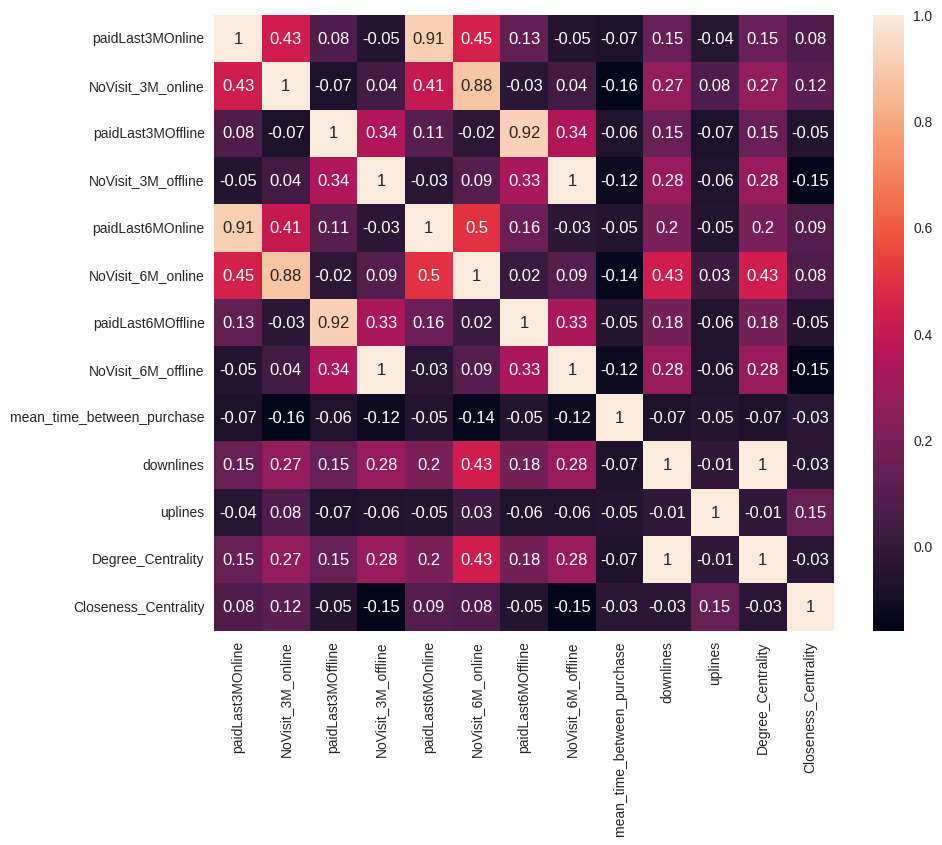

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr().round(decimals=2), annot=True)
plt.show()

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def Findsilhouette(data):
  k_values = range(1, 10)
  X = df3.iloc[:, 1:].values
  # Initialize a list to store the sum of squared distances
  sse = []

  # Perform k-means clustering for each k value
  for k in k_values:
    # Initialize the k-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the sum of squared distances to the list
    sse.append(kmeans.inertia_)

  # Plot the elbow curve
  plt.plot(k_values, sse, 'bx-')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Sum of Squared Distances')
  plt.title('Elbow Method for Optimal k')
  plt.show()

  X = data.iloc[:, 1:].values
  k_value = [3,4,5,6,7,8,9]
  silhouette_scores = []

  for k in k_value:
    print(k)
    kmeans = KMeans(n_clusters = k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_kmeans)
    print(f"Silhouette Score for K = {k} : {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

  best_k = k_value[silhouette_scores.index(max(silhouette_scores))]
  print(f"Best Silhouette Score is K = {best_k}")

In [23]:
from sklearn.decomposition import PCA

def ProcessClustering(data, kvalue, clusterName):
  X = data.iloc[:, 1:].values

  k = kvalue  # Set the number of clusters
  kmeans = KMeans(n_clusters=k, random_state=42)
  y_kmeans = kmeans.fit_predict(X)

  data[clusterName] = y_kmeans

  # Reduce dimensionality to 2D
  pca = PCA(n_components=2)
  pca_features = pca.fit_transform(X)

  # Plot the clusters
  plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_kmeans)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('K-means Clustering')
  plt.show()

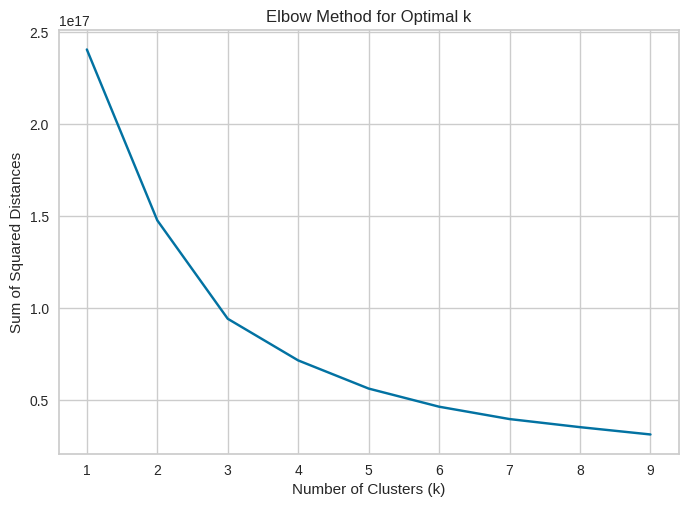

3
Silhouette Score for K = 3 : 0.7074509515113536
4
Silhouette Score for K = 4 : 0.6119680695147511
5
Silhouette Score for K = 5 : 0.6437143329219959
6
Silhouette Score for K = 6 : 0.6396471189066718
7
Silhouette Score for K = 7 : 0.6476400380213482
8
Silhouette Score for K = 8 : 0.6448807625467035
9
Silhouette Score for K = 9 : 0.6458258958032609
Best Silhouette Score is K = 3


In [24]:
Findsilhouette(df3)

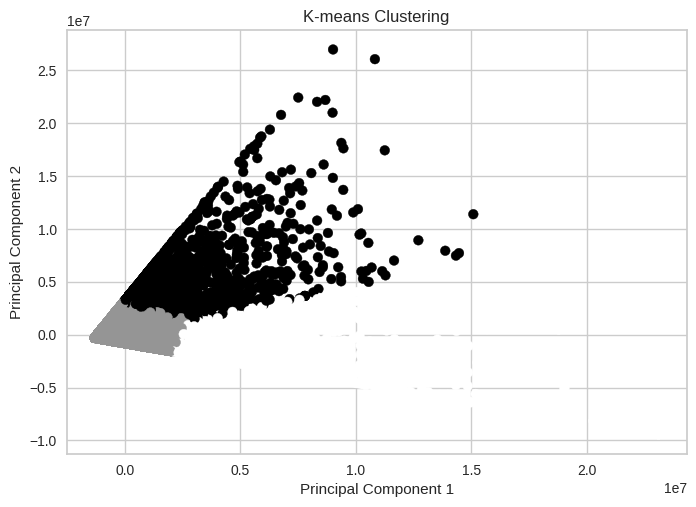

In [25]:
ProcessClustering(df3, 3, 'ClusterAll')

In [26]:
print(df3)

               ent  paidLast3MOnline  NoVisit_3M_online  paidLast3MOffline  \
0      TCC4QCZJZQI          587500.0                3.0                0.0   
1      TCC4QCE34Z7         4289500.0               12.0           396000.0   
2      TCC44Q3JQQ2         1589000.0                1.0          1891000.0   
3      TCC4JZCJ1JK         2704000.0                7.0                0.0   
4      TCC4WQRQZ40          398000.0               20.0                0.0   
...            ...               ...                ...                ...   
28851  TCCEQ1Z1QC7               0.0                0.0          1538000.0   
28852  TCCEQ1Z1QEF               0.0                0.0          1538000.0   
28853  TCCEQ1Z1QW0               0.0                0.0          1538000.0   
28854  TCCEQ1Q1CE7          498000.0                1.0                0.0   
28855  TCCEQC144J7               0.0                0.0           742000.0   

       NoVisit_3M_offline  paidLast6MOnline  NoVisit_6M_online 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def RandomForest(data):
  # Split data into features and target variable
  X = data.iloc[:, 1:data.shape[1]-1]
  y = data.iloc[:, data.shape[1]-1:df3.shape[1]]

  # Split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train the Random Forest model on the entire training data
  model = RandomForestClassifier()
  model.fit(X_train, y_train)

  # Extract feature importances
  importances = model.feature_importances_
  ingredient_names = X.columns
  feature_importances = sorted(zip(importances, ingredient_names), reverse=True)

  # Print the top 20 important features
  print("Top 20 Important Features:")
  for importance, ingredient in feature_importances[:20]:
    print(f"{ingredient}: {importance}")

In [28]:
RandomForest(df3)



Top 20 Important Features:
paidLast6MOnline: 0.31759623162233047
paidLast6MOffline: 0.21714306510716577
paidLast3MOnline: 0.21574541963215907
paidLast3MOffline: 0.16693140876535978
NoVisit_6M_online: 0.02285245061745286
NoVisit_3M_online: 0.014356317077275835
mean_time_between_purchase: 0.008678075463996746
Degree_Centrality: 0.008574378644951726
downlines: 0.008476772979311027
NoVisit_3M_offline: 0.00754998782374144
NoVisit_6M_offline: 0.007009137459765415
uplines: 0.004710583966609894
Closeness_Centrality: 0.00037617083988006003


- Classification by spending behavior

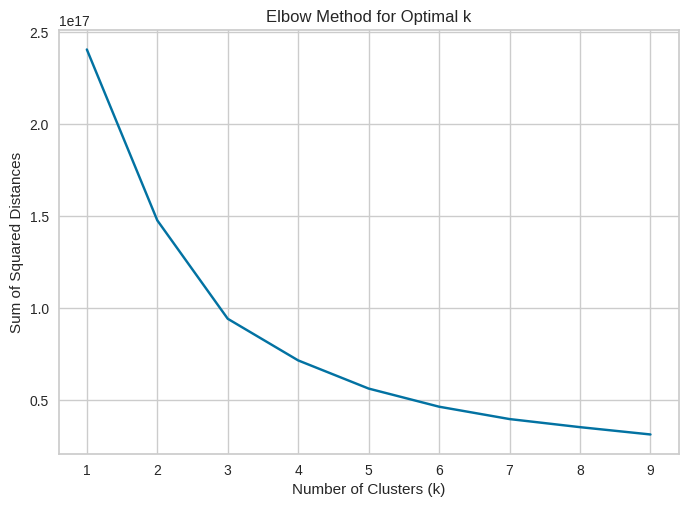

3
Silhouette Score for K = 3 : 0.7074443854414384
4
Silhouette Score for K = 4 : 0.6119758526026092
5
Silhouette Score for K = 5 : 0.6437229917515473
6
Silhouette Score for K = 6 : 0.639590397310304
7
Silhouette Score for K = 7 : 0.6478446026827549
8
Silhouette Score for K = 8 : 0.6448945465268318
9
Silhouette Score for K = 9 : 0.6458403531168131
Best Silhouette Score is K = 3


In [29]:
Findsilhouette(dfCLV)

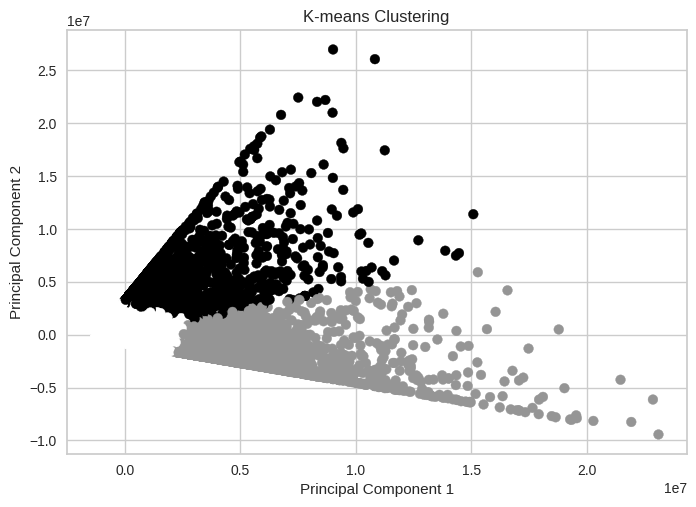

Top 20 Important Features:
paidLast6MOnline: 0.41147140761185425
paidLast6MOffline: 0.26169718664566133
paidLast3MOnline: 0.1780498898155547
paidLast3MOffline: 0.14878151592692987


In [30]:
ProcessClustering(dfCLV, 3, 'ClusterCLV')
RandomForest(dfCLV)

- We found that consistency payment either 3M or 6M is important factor for classification in both online and offline payment

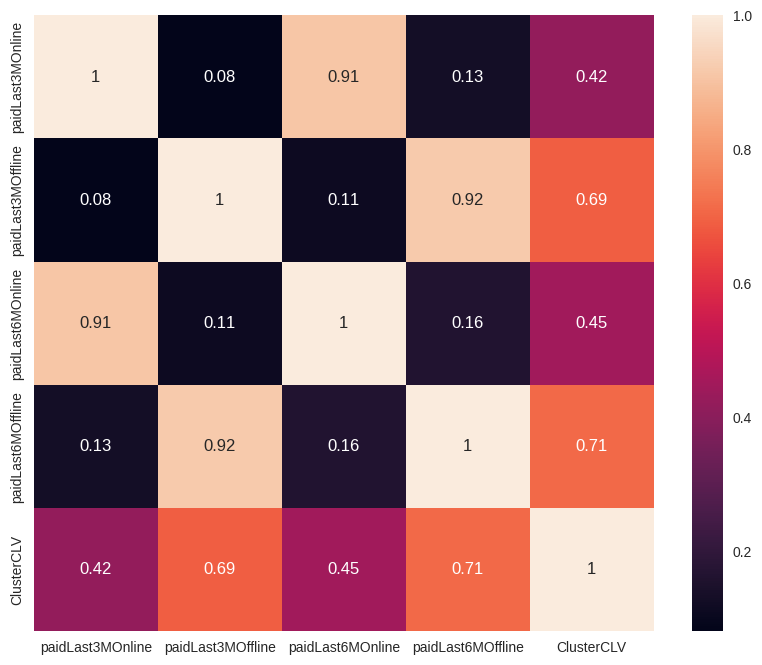

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfCLV.corr().round(decimals=2), annot=True)
plt.show()

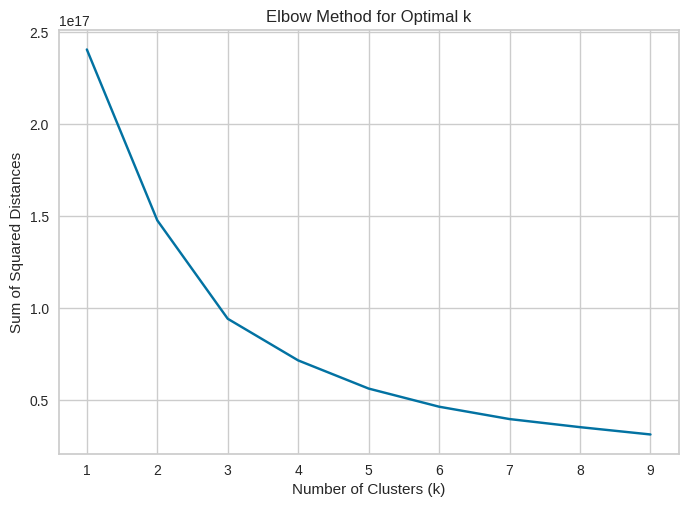

3
Silhouette Score for K = 3 : 0.5341471215233554
4
Silhouette Score for K = 4 : 0.49115592884270043
5
Silhouette Score for K = 5 : 0.4788083141891202
6
Silhouette Score for K = 6 : 0.49582072460197585
7
Silhouette Score for K = 7 : 0.4974170083646143
8
Silhouette Score for K = 8 : 0.4729128781927807
9
Silhouette Score for K = 9 : 0.47381690848870295
Best Silhouette Score is K = 3


In [32]:
Findsilhouette(dfFrequency)

- Classification by frequency visit

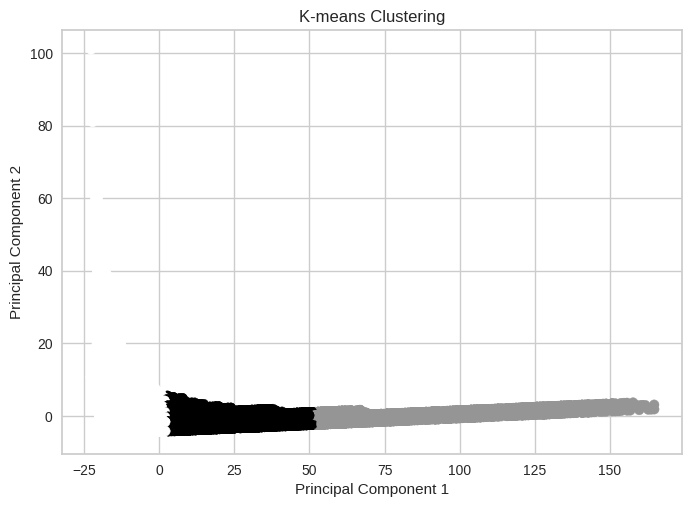

Top 20 Important Features:
mean_time_between_purchase: 0.8935234220170786
NoVisit_6M_online: 0.04127258832189977
NoVisit_3M_online: 0.028959945774304
NoVisit_6M_offline: 0.019930399455497388
NoVisit_3M_offline: 0.01631364443122034


In [33]:
ProcessClustering(dfFrequency, 3, 'ClusterFrequency')
RandomForest(dfFrequency)

- Mean time between purchase is the factor for classification

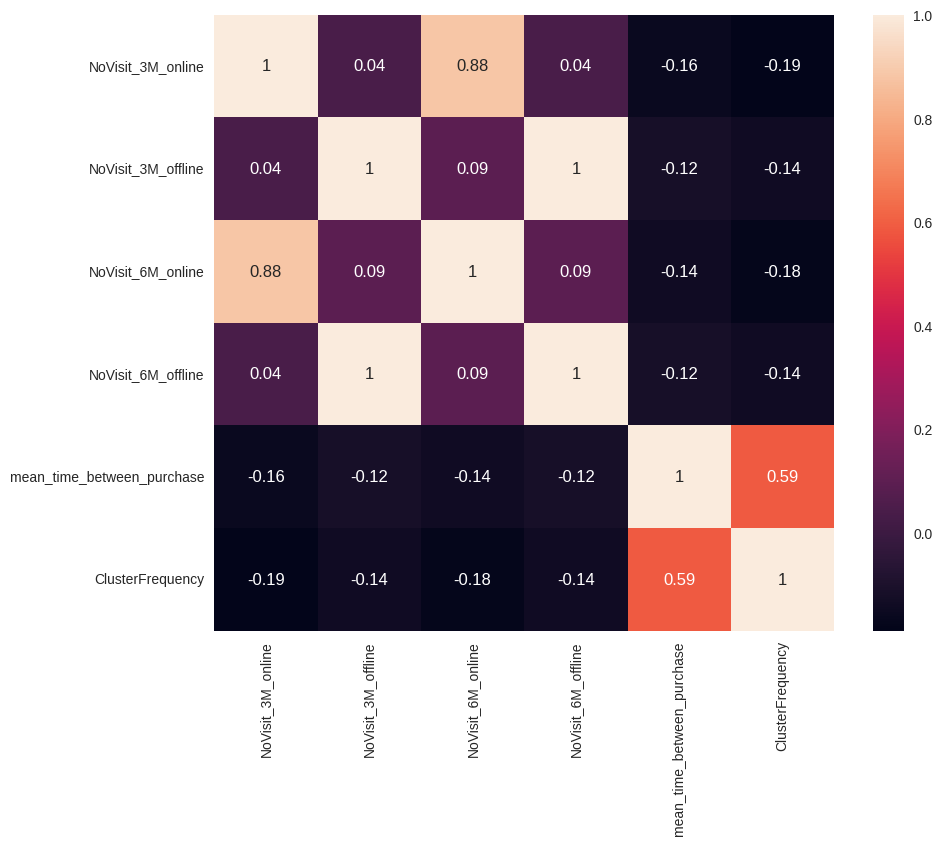

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfFrequency.corr().round(decimals=2), annot=True)
plt.show()

                   min    max
ClusterFrequency             
0                  0.0   22.0
1                 72.0  185.0
2                 23.0   71.0
                  count
ClusterFrequency       
0                 19745
1                  1409
2                  7702


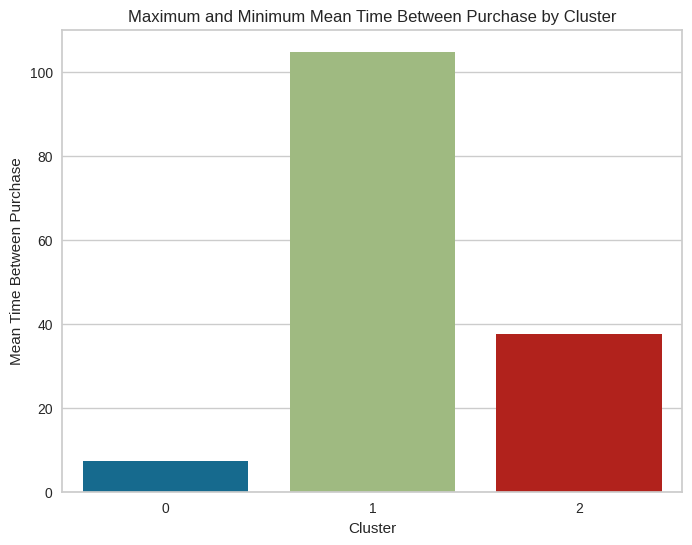

In [35]:
# Calculate maximum and minimum mean time between purchases for each cluster
cluster_stats = dfFrequency.groupby('ClusterFrequency')['mean_time_between_purchase'].agg(['min', 'max'])
count = dfFrequency.groupby('ClusterFrequency')['ent'].agg(['count'])

# Display the results as a table
print(cluster_stats)
print(count)

# Create a bar plot to visualize the maximum and minimum values
plt.figure(figsize=(8, 6))
sns.barplot(x='ClusterFrequency', y='mean_time_between_purchase', data=dfFrequency, ci=None)
plt.xlabel('Cluster')
plt.ylabel('Mean Time Between Purchase')
plt.title('Maximum and Minimum Mean Time Between Purchase by Cluster')
plt.show()

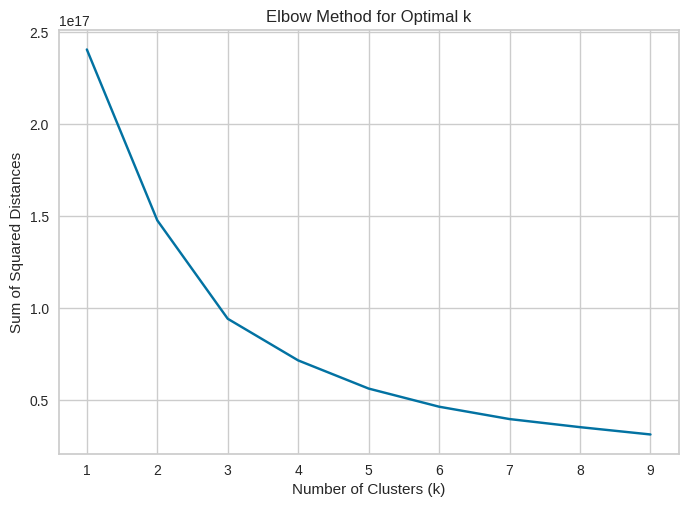

3
Silhouette Score for K = 3 : 0.9038187657196317
4
Silhouette Score for K = 4 : 0.7093770639091899
5
Silhouette Score for K = 5 : 0.640971603142284
6
Silhouette Score for K = 6 : 0.6395036425222107
7
Silhouette Score for K = 7 : 0.5740788346539767
8
Silhouette Score for K = 8 : 0.5830021171275355
9
Silhouette Score for K = 9 : 0.6049509985999899
Best Silhouette Score is K = 3


In [36]:
Findsilhouette(dfSNA)

- Classification by SNA

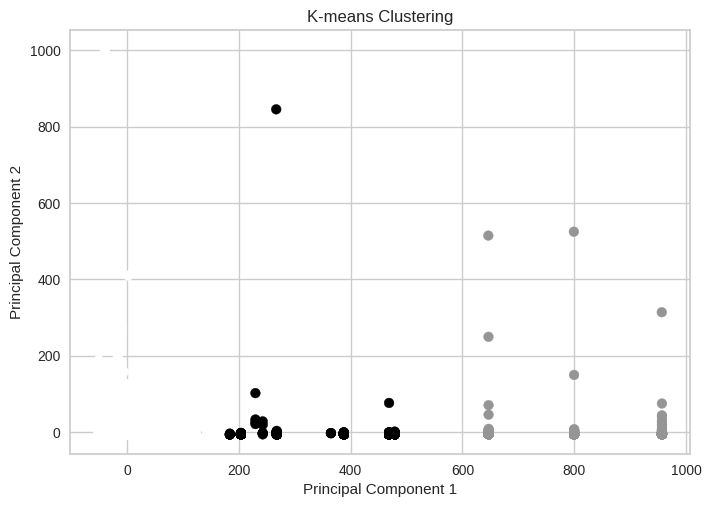

Top 20 Important Features:
uplines: 0.9757840518735312
Degree_Centrality: 0.011571016482441639
downlines: 0.007076942822700007
Closeness_Centrality: 0.005567988821327171


In [37]:
ProcessClustering(dfSNA, 3, 'ClusterSNA')
RandomForest(dfSNA)

- Upline feature is the main feature for classification

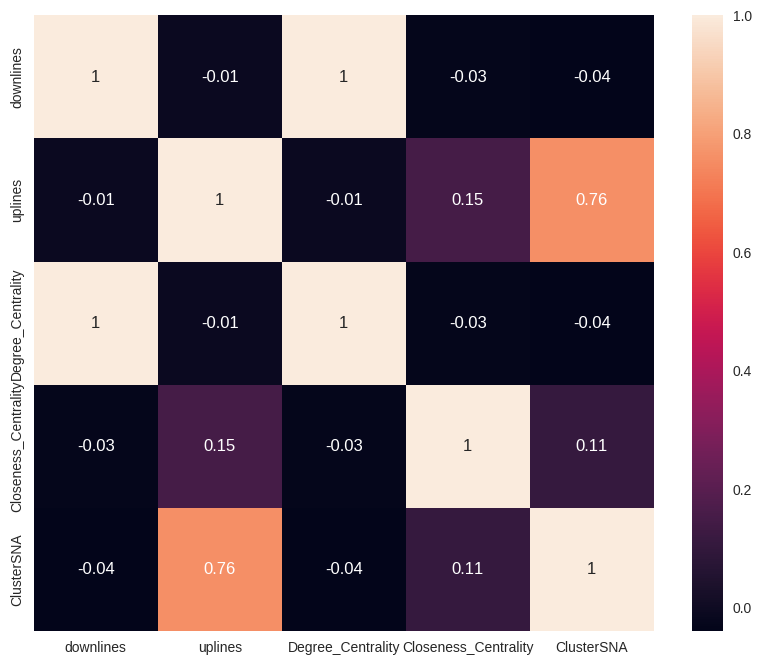

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfSNA.corr().round(decimals=2), annot=True)
plt.show()

              min     max
ClusterSNA               
0             0.0   221.0
1           698.0  1008.0
2           235.0   530.0
            count
ClusterSNA       
0           27599
1             685
2             572


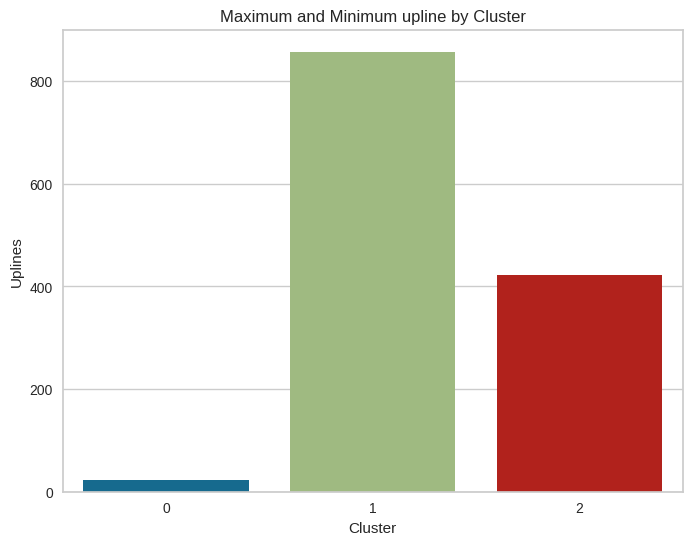

In [39]:
# Calculate maximum and minimum mean time between purchases for each cluster
cluster_stats = dfSNA.groupby('ClusterSNA')['uplines'].agg(['min', 'max'])
count = dfSNA.groupby('ClusterSNA')['ent'].agg(['count'])

# Display the results as a table
print(cluster_stats)
print(count)

# Create a bar plot to visualize the maximum and minimum values
plt.figure(figsize=(8, 6))
sns.barplot(x='ClusterSNA', y='uplines', data=dfSNA, ci=None)
plt.xlabel('Cluster')
plt.ylabel('Uplines')
plt.title('Maximum and Minimum upline by Cluster')
plt.show()

In [40]:
dfCluster = dfCLV[['ent','ClusterCLV']].reset_index()
dfTemp = dfFrequency[['ent','ClusterFrequency']].reset_index()
dfCluster = dfCluster.merge(dfTemp, on = 'ent')
dfTemp = dfSNA[['ent','ClusterSNA']].reset_index()
dfCluster = dfCluster.merge(dfTemp, on = 'ent')
#dfCluster['ClusterName'] = str(dfCluster['ClusterCLV']) + str(dfCluster['ClusterFrequency']) + str(dfCluster['ClusterSNA'])
dfCluster.head()

,index_x,ent,ClusterCLV,index_y,ClusterFrequency,index,ClusterSNA
0,0,TCC4QCZJZQI,0,0,2,0,0
1,1,TCC4QCE34Z7,1,1,0,1,0
2,2,TCC44Q3JQQ2,1,2,0,2,0
3,3,TCC4JZCJ1JK,1,3,0,3,0
4,4,TCC4WQRQZ40,0,4,0,4,0


In [52]:
result = gdrive_path + 'dfCluster.xlsx'
with pd.ExcelWriter(result) as writer:
        dfCluster.to_excel(writer, index=False)

In [41]:
dfClusterType = pd.DataFrame()
dfClusterType = dfCluster.groupby(['ClusterCLV', 'ClusterFrequency', 'ClusterSNA'])['ent'].count().reset_index()

# Rename the 'ent' column to 'Count'
dfClusterType.rename(columns={'ent': 'Count'}, inplace=True)
print(dfClusterType)

    ClusterCLV  ClusterFrequency  ClusterSNA  Count
0            0                 0           0  15630
1            0                 0           1    477
2            0                 0           2    464
3            0                 1           0   1335
4            0                 1           1     22
5            0                 1           2      8
6            0                 2           0   6415
7            0                 2           1    174
8            0                 2           2     78
9            1                 0           0   1913
10           1                 0           1      9
11           1                 0           2     13
12           1                 1           0     23
13           1                 2           0    576
14           1                 2           1      2
15           1                 2           2      1
16           2                 0           0   1232
17           2                 0           1      1
18          

# 2. Product recommendation

In [42]:
pathItem = gdrive_path + "Item_sold.csv"
dfItem = pd.read_csv(pathItem)
print(dfItem)

           Index              Payment_Date Payment_period          ent  \
0              1  2021-01-01T00:00:00.000Z         2021/1  TCC43RQQZ3B   
1              1  2021-01-01T00:00:00.000Z         2021/1  TCC43RQQZ3B   
2              2  2021-01-01T00:00:00.000Z         2021/1  TCC4Q4JZ4Q0   
3              2  2021-01-01T00:00:00.000Z         2021/1  TCC4Q4JZ4Q0   
4              3  2021-01-01T00:00:00.000Z         2021/1  TCC4RJ11QE7   
...          ...                       ...            ...          ...   
4129100  2406312  2023-07-06T00:00:00.000Z         2023/7  TCCEREZCC10   
4129101  2406313  2023-07-06T00:00:00.000Z         2023/7  TCCEQ1RJ3JY   
4129102  2406314  2023-07-06T00:00:00.000Z         2023/7  TCCEQ4Z4R4Y   
4129103  2406315  2023-07-06T00:00:00.000Z         2023/7  TCCEQEZJQ4F   
4129104  2406316  2023-07-06T00:00:00.000Z         2023/7  TCCEQ434R1F   

        Sold_product  Qty sold  Channel  
0               1ECZ         1   online  
1             8CEC4Q       

In [43]:
dfItem.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,4129105.0,1.289323e+06,661600.539057,1.0,764188.0,1342205.0,1829846.0,2406316.0
Qty sold,4129105.0,1.446161e+00,9.241024,1.0,1.0,1.0,1.0,13300.0


In [44]:
dfItem.head()

,Index,Payment_Date,Payment_period,ent,Sold_product,Qty sold,Channel
0,1,2021-01-01T00:00:00.000Z,2021/1,TCC43RQQZ3B,1ECZ,1,online
1,1,2021-01-01T00:00:00.000Z,2021/1,TCC43RQQZ3B,8CEC4Q,1,online
2,2,2021-01-01T00:00:00.000Z,2021/1,TCC4Q4JZ4Q0,4E4W,2,online
3,2,2021-01-01T00:00:00.000Z,2021/1,TCC4Q4JZ4Q0,DC4CC4,1,online
4,3,2021-01-01T00:00:00.000Z,2021/1,TCC4RJ11QE7,IC4CC4,1,online


In [45]:
dfItemFilter = dfItem.loc[dfItem['ent'].isin(dfCluster['ent'])]
print(dfItemFilter)
dfItemFilter.head()

           Index              Payment_Date Payment_period          ent  \
69            55  2021-01-01T00:00:00.000Z         2021/1     TZEEQRRU   
76            59  2021-01-01T00:00:00.000Z         2021/1  TCC4QEZQW4I   
77            59  2021-01-01T00:00:00.000Z         2021/1  TCC4QEZQW4I   
78            59  2021-01-01T00:00:00.000Z         2021/1  TCC4QEZQW4I   
131          102  2021-01-01T00:00:00.000Z         2021/1  TCC4R41QQW5   
...          ...                       ...            ...          ...   
4129100  2406312  2023-07-06T00:00:00.000Z         2023/7  TCCEREZCC10   
4129101  2406313  2023-07-06T00:00:00.000Z         2023/7  TCCEQ1RJ3JY   
4129102  2406314  2023-07-06T00:00:00.000Z         2023/7  TCCEQ4Z4R4Y   
4129103  2406315  2023-07-06T00:00:00.000Z         2023/7  TCCEQEZJQ4F   
4129104  2406316  2023-07-06T00:00:00.000Z         2023/7  TCCEQ434R1F   

        Sold_product  Qty sold  Channel  
69            5C4C4Q         1   online  
76            5C4CC4       

,Index,Payment_Date,Payment_period,ent,Sold_product,Qty sold,Channel
69,55,2021-01-01T00:00:00.000Z,2021/1,TZEEQRRU,5C4C4Q,1,online
76,59,2021-01-01T00:00:00.000Z,2021/1,TCC4QEZQW4I,5C4CC4,1,online
77,59,2021-01-01T00:00:00.000Z,2021/1,TCC4QEZQW4I,BC4CC4,1,online
78,59,2021-01-01T00:00:00.000Z,2021/1,TCC4QEZQW4I,XC4CCE,1,online
131,102,2021-01-01T00:00:00.000Z,2021/1,TCC4R41QQW5,8C4CCQ,1,online


In [46]:
dfCluster2 = dfCluster.loc[(dfCluster['ClusterCLV'] == 0) & (dfCluster['ClusterFrequency'] == 0) & (dfCluster['ClusterSNA'] == 0)]
print(dfCluster2)
dfItemFilter2 = dfItem.loc[dfItem['ent'].isin(dfCluster2['ent'])]
print(dfItemFilter2)

       index_x          ent  ClusterCLV  index_y  ClusterFrequency  index  \
4            4  TCC4WQRQZ40           0        4                 0      4   
11          11  TCC4E1C1EZK           0       11                 0     11   
13          13  TCC4RWE3Z45           0       13                 0     13   
14          14  TCC4WQCQR42           0       14                 0     14   
15          15  TCC41C1QECI           0       15                 0     15   
...        ...          ...         ...      ...               ...    ...   
28851    28851  TCCEQ1Z1QC7           0    28851                 0  28851   
28852    28852  TCCEQ1Z1QEF           0    28852                 0  28852   
28853    28853  TCCEQ1Z1QW0           0    28853                 0  28853   
28854    28854  TCCEQ1Q1CE7           0    28854                 0  28854   
28855    28855  TCCEQC144J7           0    28855                 0  28855   

       ClusterSNA  
4               0  
11              0  
13             

In [47]:
purchased_items = dfItemFilter2.groupby(['ent'])['Sold_product'].agg(list).reset_index()
purchased_items.head()

,ent,Sold_product
0,BCCCCREW3WY,"[UC4CC1, KCQCEC, 8CECCZ, BCECCQ, UCECC4, BC4C4..."
1,BCE4JERY,"[8C4CC4, 8C4CCR, 44C4, 4E1J, IC4CC4, 8C4CCR, 8..."
2,DCCCCC4QC1Y,"[8C4CCR, 5CJCCW, 8C4CCR, KCEC4W, 8C4CCR, YC1CC4]"
3,DCCCCC4WRC5,"[KCJCJC, 5C4CCE, BC4CCW, XC4CCE, KCEC4W, 8C4CC..."
4,HCQ1QZ12,"[5C4CCE, 44C4, 5C4CCE, 6CQC41, 5C4CCE, BC4CC4,..."


5 Type of recommenders
1. Most pupular item
2. Content Filtering
3. Collaborative filtering
- Memory-based method => User-based, item-item
- Model-based =>
  Extending decision and regression trees,
  rule-based collaborative filtering, =>Apriori
  naive bays collaborative filter,
  laten factor model
4. Association and market basket model
5. Hybrid Models

In [48]:
pip install mlxtend

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(purchased_items['Sold_product'])
df_pi = pd.DataFrame(encoded_data, columns=mlb.classes_)

In [50]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
frequent_itemsets = apriori(df_pi, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

In [ ]:
print(frequent_itemsets.sort_values(by='support', ascending=False))

In [ ]:
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 0.4)
rules

In [ ]:
rules.sort_values(by='support', ascending=False)

In [ ]:
rules1 = rules[rules['support'] >= 0.05]
import networkx as nx
import matplotlib.pyplot as plt


# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
nodes = set()
for i in range(len(rules1)):
    nodes.add(rules1.loc[i, 'antecedents'])
    nodes.add(rules1.loc[i, 'consequents'])
G.add_nodes_from(nodes)

# Add edges to the graph
for i in range(len(rules1)):
    antecedents = rules1.loc[i, 'antecedents']
    consequents = rules1.loc[i, 'consequents']
    support = round(rules1.loc[i, 'support'],2)
    G.add_edge(antecedents, consequents, weight=support)

# Set the position of nodes in the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, font_size=6, edge_color='gray',width=1.5)

# Add edge weights as labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Show the graph
plt.show()